**Корректность проверена на Python 3.6:**
+ matplotlib 3.0.2
+ sklearn 0.20.2

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [21]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [23]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [24]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

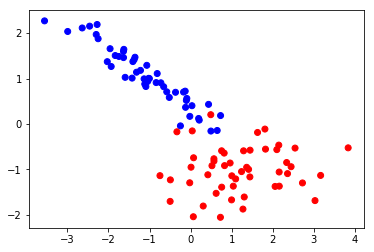

In [25]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(clf_data[:,0], clf_data[:,1], c = clf_target, cmap = colors)

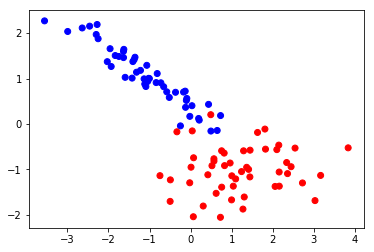

In [28]:
pylab.scatter(clf_data[:,0], clf_data[:,1], c = clf_target, cmap = colors)

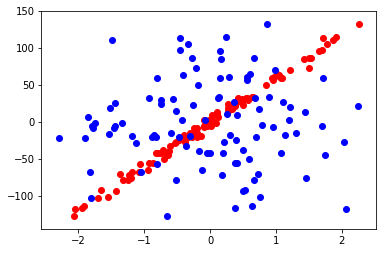

In [29]:
pylab.scatter(reg_data[:,1], reg_target, color = 'r')
pylab.scatter(reg_data[:,0], reg_target, color = 'b')

In [30]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [31]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [32]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1, max_iter=1000)

In [33]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [34]:
predictions = classifier.predict(clf_test_data)

In [35]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [36]:
print(clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [37]:
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [38]:
print(probability_predictions)

[[1.47830304e-09 9.99999999e-01]
 [9.94270335e-01 5.72966493e-03]
 [9.84932678e-01 1.50673216e-02]
 [2.74687769e-08 9.99999973e-01]
 [9.99973086e-01 2.69143104e-05]
 [4.80533394e-03 9.95194666e-01]
 [8.64630669e-06 9.99991354e-01]
 [9.99554362e-01 4.45637858e-04]
 [2.56274917e-06 9.99997437e-01]
 [9.99394004e-01 6.05996269e-04]
 [9.85203747e-01 1.47962532e-02]
 [2.06774603e-01 7.93225397e-01]
 [2.49130795e-06 9.99997509e-01]
 [1.96026001e-03 9.98039740e-01]
 [9.99457539e-01 5.42461102e-04]
 [9.72333695e-01 2.76663047e-02]
 [1.56849587e-08 9.99999984e-01]
 [9.99950427e-01 4.95728534e-05]
 [9.99940133e-01 5.98672868e-05]
 [4.12282468e-04 9.99587718e-01]
 [9.98944763e-01 1.05523722e-03]
 [9.92067627e-01 7.93237334e-03]
 [9.28044449e-01 7.19555513e-02]
 [9.99964529e-01 3.54714651e-05]
 [9.92038500e-01 7.96149996e-03]
 [9.13446587e-01 8.65534130e-02]
 [3.00598244e-01 6.99401756e-01]
 [1.62479554e-04 9.99837520e-01]
 [1.88956301e-01 8.11043699e-01]
 [9.99766813e-01 2.33187331e-04]]


#### accuracy

In [41]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9666666666666667

In [42]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9666666666666667

#### confusion matrix

In [43]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[17  1]
 [ 0 12]]


In [44]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

29

In [45]:
matrix.diagonal().sum()

29

#### precision 

In [48]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

1.0

In [49]:
metrics.precision_score(clf_test_labels, predictions)

0.9230769230769231

#### recall

In [50]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [51]:
metrics.recall_score(clf_test_labels, predictions)

1.0

#### f1

In [52]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9714285714285714

In [53]:
metrics.f1_score(clf_test_labels, predictions)

0.9600000000000001

#### classification report

In [54]:
print(metrics.classification_report(clf_test_labels, predictions))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        18
          1       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        30



#### ROC curve

In [55]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

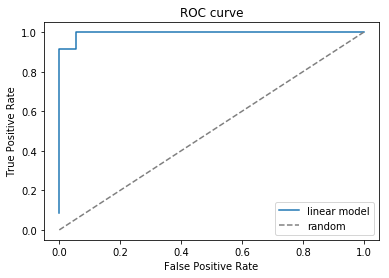

In [56]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [57]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9722222222222222

In [58]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9953703703703703

#### PR AUC

In [59]:
metrics.average_precision_score(clf_test_labels, predictions)

0.9230769230769231

#### log_loss

In [61]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.0799522288701126

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [62]:
regressor = linear_model.SGDRegressor(random_state = 1, max_iter = 20)

In [63]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=20, n_iter=None, penalty='l2',
       power_t=0.25, random_state=1, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [64]:
reg_predictions = regressor.predict(reg_test_data)

In [65]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [66]:
print(reg_predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551
 -78.9843398   84.80190097  14.80638314  22.91302375 -89.63572717
  14.5954632   31.64431951  95.81031534  21.5037679  -43.1101736
 -95.06972123  86.70086546   0.47837761 -16.44594704 -22.72581879]


#### mean absolute error

In [67]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

#### mean squared error

In [68]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

#### root mean squared error

In [69]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.91069502183356

#### r2 score

In [70]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.989317615054695